In [1]:
from IPython.display import display, Math, Markdown
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import rslaser
import scipy.optimize as opt

In [2]:
def super_gaussian(params, amplitude, xo, yo, sigma, exponent):
    exponent = 0.0001*exponent
    xo = float(xo)
    yo = float(yo)
    r = np.sqrt((params[0] - xo)**2 + (params[1] - yo)**2)
    g = amplitude * np.exp(-(r/abs(sigma))**exponent)
    return g.ravel()

In [3]:
image_file_name = 'basler_532nm_pump.bmp'
package_data_dir = rslaser.pkg_resources.resource_filename('rslaser','package_data')
path_to_file = os.path.join(package_data_dir, image_file_name)
image = Image.open(path_to_file)
img_orig = np.array(image)

In [4]:
print('np.shape(img_orig) = ', np.shape(img_orig))
print('min_orig = ', np.min(img_orig))
print('max_orig = ', np.max(img_orig))

# read the pixel size from the diagnostic metadata file
meta_data_file_name = 'basler_meta.dat'
path_to_file2 = os.path.join(package_data_dir, meta_data_file_name)
with open(path_to_file2) as fh:
    for line in fh:
        if line.startswith("pixel_size_h_microns"):
            pixel_size_h = float(line.split(":")[-1].split(",")[0])  # microns
        if line.startswith("pixel_size_v_microns"):
            pixel_size_v = float(line.split(":")[-1].split(",")[0])  # microns
display(Markdown(' pixel size is {} [$\mu m$] by {} [$\mu m$]'.format(pixel_size_h,pixel_size_v)))

np.shape(img_orig) =  (540, 720)
min_orig =  6
max_orig =  175


 pixel size is 6.9 [$\mu m$] by 6.9 [$\mu m$]

In [5]:
x = np.linspace(0, img_orig.shape[1] - 1, img_orig.shape[1])
y = np.linspace(0, img_orig.shape[0] - 1, img_orig.shape[0])
x, y = np.meshgrid(x, y)

initial_guess = (3, 300, 300, 10, 2)
popt, pcov = opt.curve_fit(super_gaussian, (x, y), img_orig.flatten(), p0=initial_guess, maxfev=10000)
img_fit = super_gaussian((x, y), *popt).reshape(img_orig.shape)

In [6]:
_max = popt[0]
_rx = popt[1]
_ry = popt[2]
_sig = popt[3]
_exp = popt[4] * 1.e-4
print('_max = ', _max)
print('_sig = ', _sig)
print('_exp = ', _exp)

_max =  166.3483719586317
_sig =  176.02489083946534
_exp =  1.6669517822155042


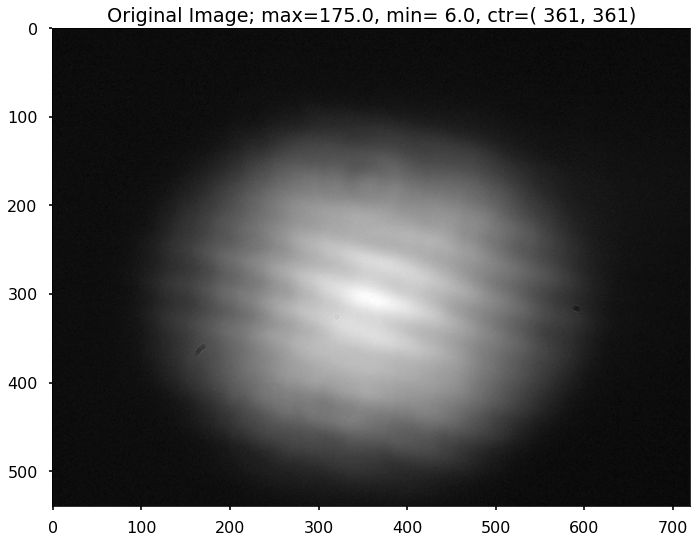

In [7]:
# plot twoD_Gaussian data generated above
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
#    ax.imshow(img_orig, cmap='gray', vmin=0, vmax=255)
    ax.imshow(img_orig, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title('Original Image; max={0:4.1f}'.format(np.max(img_orig))+', min={0:4.1f}'.format(np.min(img_orig))+', ctr=({0:4.0f},{0:4.0f})'.format(_rx,_ry))

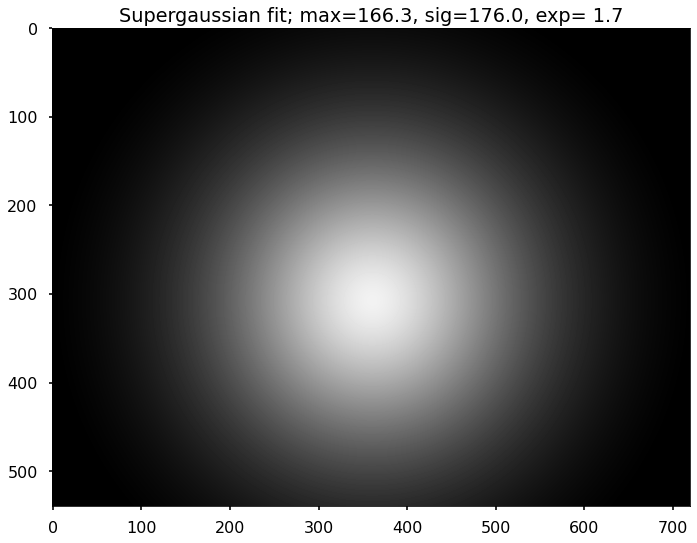

In [8]:
# plot twoD_Gaussian data generated above
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_fit, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title('Supergaussian fit; max={0:4.1f}, '.format(_max)+'sig={0:4.1f}, '.format(_sig)+'exp={0:4.1f}'.format(_exp))

min_diff =  -22.478236612750173
max_diff =  19.905516811776366
relative deviation (above) =  11.37458103530078 %
relative deviation (below) =  12.844706635857243 %


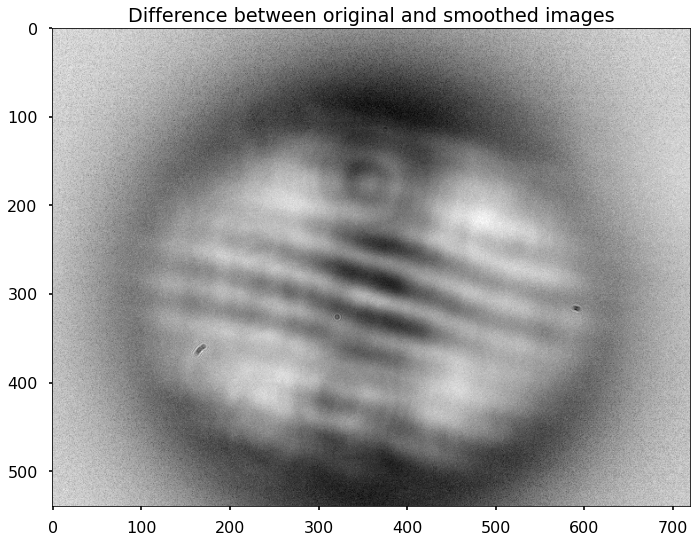

In [9]:
# img_diff = 128 + img_orig - img_fit
img_diff = img_orig - img_fit

print('min_diff = ', np.min(img_diff))
print('max_diff = ', np.max(img_diff))
    
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_diff, cmap='gray', vmin=np.min(img_diff), vmax=np.max(img_diff))
    ax.set_title("Difference between original and smoothed images")

print('relative deviation (above) = ', 100.*(np.max(img_diff)/np.max(img_orig)), '%')
print('relative deviation (below) = ', 100.*(abs(np.min(img_diff))/np.max(img_orig)), '%')

In [10]:
print(' ')
print('*************************')
print('img_orig = ')
print(img_orig)
min_orig = np.min(img_orig)
max_orig = np.max(img_orig)
print(' ')
print('min original = ', min_orig)
print('max original = ', max_orig)

print(' ')
print('*************************')
print('img_fit = ')
print(img_fit)
min_fit = np.min(img_fit)
max_fit = np.max(img_fit)
print(' ')
print('min fitted = ', min_fit)
print('max fitted = ', max_fit)

print(' ')
print('*************************')
print('img_diff = ')
print(img_diff)
min_diff = np.min(img_diff)
max_diff = np.max(img_diff)
print(' ')
print('min diff = ', min_diff)
print('max diff = ', max_diff)

 
*************************
img_orig = 
[[15 17 12 ... 12 12 15]
 [12 15 15 ... 15 15 15]
 [15 12 15 ... 17 12 12]
 ...
 [12 15  9 ... 12 15 15]
 [15 15 15 ... 15 15 12]
 [15 15 15 ...  9 12 12]]
 
min original =  6
max original =  175
 
*************************
img_fit = 
[[0.90020203 0.91283903 0.9256245  ... 0.96159897 0.94839834 0.93534961]
 [0.91096628 0.92376026 0.93670467 ... 0.97312685 0.95976185 0.94655073]
 [0.92182856 0.93478104 0.94788591 ... 0.98476016 0.97122918 0.95785411]
 ...
 [2.06423278 2.09423979 2.12461805 ... 2.21019281 2.17877472 2.14773738]
 [2.04534136 2.07506121 2.10514853 ... 2.18990248 2.15878595 2.12804629]
 [2.02654955 2.0559839  2.08578196 ... 2.16971986 2.13890315 2.10845943]]
 
min fitted =  0.9002020297857013
max fitted =  166.34565405469425
 
*************************
img_diff = 
[[14.09979797 16.08716097 11.0743755  ... 11.03840103 11.05160166
  14.06465039]
 [11.08903372 14.07623974 14.06329533 ... 14.02687315 14.04023815
  14.05344927]
 [14.078171